In [1]:
# functions from other notebook file
from ipynb.fs.full.shared_functions import *

import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pyplot
import os

In [2]:
data_directory = os.path.join(os.getcwd() + '/datasets/OpenSans-Italic')

In [3]:
model = models.load_model('my_model')
model.summary()

2021-08-31 13:24:49.914620: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-31 13:24:49.915421: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0     

In [4]:
data_frame = create_captcha_dataframe(data_directory)
data_frame.head()

,label,file
0,8946,/home/t-visor/repositories/captcha-tensorflow/...
1,4378,/home/t-visor/repositories/captcha-tensorflow/...
2,0266,/home/t-visor/repositories/captcha-tensorflow/...
3,3254,/home/t-visor/repositories/captcha-tensorflow/...
4,8852,/home/t-visor/repositories/captcha-tensorflow/...


In [5]:
train_indices, validation_indices, test_indices = shuffle_and_split_data(data_frame)

print('train count: %s, validation count: %s, test count: %s' % (
    len(train_indices), len(validation_indices), len(test_indices)))

train count: 3112, validation count: 1335, test count: 1906


In [6]:
testing_set_generator = get_captcha_generator(data_frame, test_indices, for_training=False, batch_size=128)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

2021-08-31 13:24:50.481254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


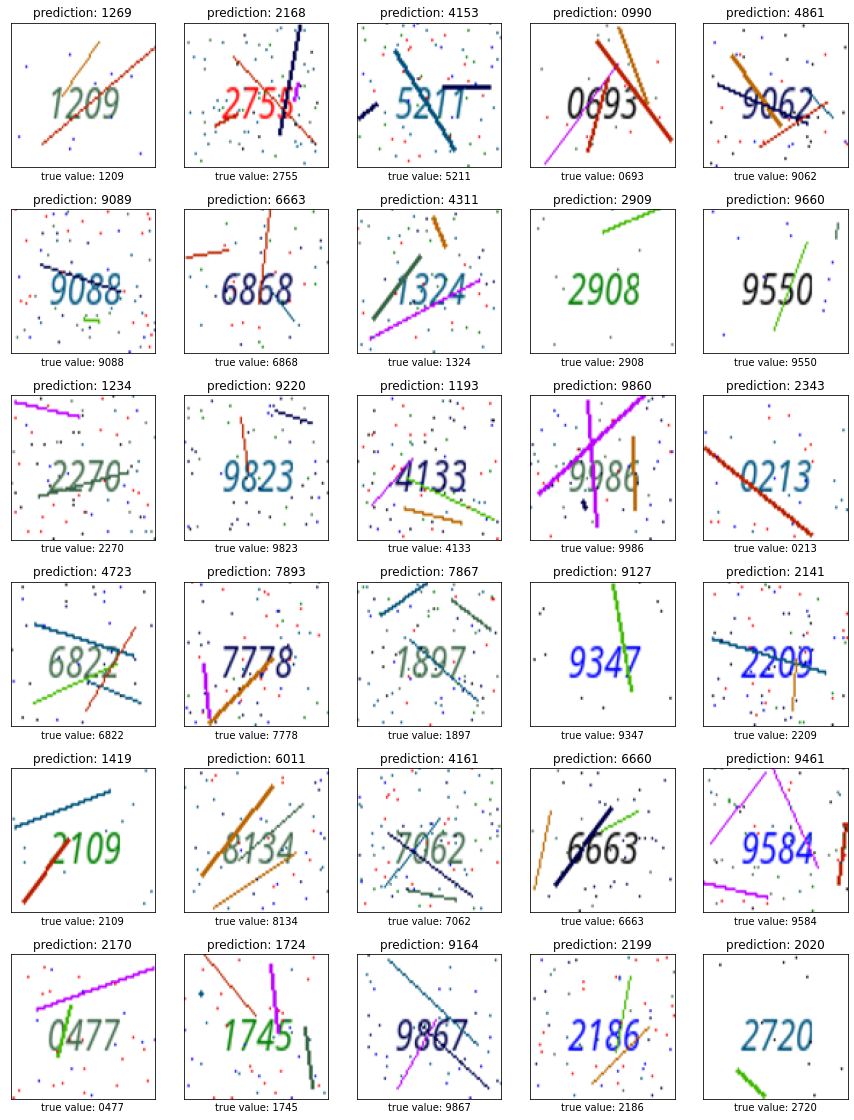

In [7]:
display_predictions_from_model(captcha_images, predictions, true_values)